<a href="https://colab.research.google.com/github/hannari-python/tutorial/blob/master/read_shp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#!pip install geopandas

import zipfile
import geopandas as gpd
import shapely
import pandas as pd

In [22]:
#! pip install descartes

import matplotlib.pyplot as plt

In [23]:
pd.set_option('max_columns', 50)

- まずZIP FILEを解凍します。
- そうするとdbf-shxの4つのファイルが現れます
- 読み込むのはshpファイルのみですが、ほかのファイルがデータを持っていてつながっているようなので、
- 捨ててはいけないことになっています。

In [24]:
with zipfile.ZipFile('A002005212015DDSWC01.zip') as myzip:
    myzip.extractall()

- 次にgeopandasを用いてshpファイルを読み込みます。

In [25]:
data = gpd.read_file('h27ka01.shp')

In [26]:
print(data.shape)
print(data.info())

(22772, 36)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22772 entries, 0 to 22771
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   KEY_CODE    22772 non-null  object  
 1   PREF        22772 non-null  object  
 2   CITY        22772 non-null  object  
 3   S_AREA      22772 non-null  object  
 4   PREF_NAME   22772 non-null  object  
 5   CITY_NAME   22772 non-null  object  
 6   S_NAME      22772 non-null  object  
 7   KIGO_E      364 non-null    object  
 8   HCODE       22772 non-null  int64   
 9   AREA        22772 non-null  float64 
 10  PERIMETER   22772 non-null  float64 
 11  H27KAxx_    22772 non-null  int64   
 12  H27KAxx_ID  22772 non-null  int64   
 13  KEN         22772 non-null  object  
 14  KEN_NAME    22772 non-null  object  
 15  SITYO_NAME  22772 non-null  object  
 16  GST_NAME    22772 non-null  object  
 17  CSS_NAME    13346 non-null  object  
 18  KIHON1      22772 non-null

- X_CODEのところに経度、Y_CODEのところに緯度情報が入っています
- geometryのところにPolygonと呼ばれる、経度緯度で場所を囲むように作ったデータが含まれます
- 上はshapelyというライブラリを使っています
- 

In [27]:
data.head()

,KEY_CODE,PREF,CITY,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,AREA,PERIMETER,H27KAxx_,H27KAxx_ID,KEN,KEN_NAME,SITYO_NAME,GST_NAME,CSS_NAME,KIHON1,DUMMY1,KIHON2,KEYCODE1,KEYCODE2,AREA_MAX_F,KIGO_D,N_KEN,N_CITY,KIGO_I,MOJI,KBSUM,JINKO,SETAI,X_CODE,Y_CODE,KCODE1,geometry
0,011010200,01,101,020000,北海道,中央区,宮ケ丘（番地）,None,8101,576029.667,4152.808,16920,16919,01,北海道,石狩振興局,札幌市,中央区,0200,-,00,101020000,1010200,M,None,None,None,None,宮ケ丘（番地）,1,4,2,141.30680,43.05148,0200-00,"POLYGON ((141.31330 43.05741, 141.31345 43.056..."
1,011010300,01,101,030000,北海道,中央区,円山,None,8101,576865.064,2957.028,21552,21551,01,北海道,石狩振興局,札幌市,中央区,0300,-,00,101030000,1010300,M,None,None,None,None,円山,1,0,0,141.31399,43.04868,0300-00,"POLYGON ((141.31560 43.05121, 141.31575 43.051..."
2,011010400,01,101,040000,北海道,中央区,円山西町,E1,8101,1435875.537,9122.136,18502,18501,01,北海道,石狩振興局,札幌市,中央区,0400,-,00,101040000,1010400,M,None,None,None,None,円山西町,6,22,7,141.30110,43.03504,0400-00,"POLYGON ((141.30727 43.03305, 141.30698 43.032..."
3,011010400,01,101,040000,北海道,中央区,円山西町,E2,8101,97741.577,1538.669,18503,18502,01,北海道,石狩振興局,札幌市,中央区,0400,-,00,101040000,1010400,None,None,None,None,None,円山西町,0,0,0,141.30149,43.04689,0400-00,"POLYGON ((141.30164 43.04536, 141.30073 43.044..."
4,011011000,01,101,100000,北海道,中央区,宮の森,E2,8101,95124.469,1625.091,392,391,01,北海道,石狩振興局,札幌市,中央区,1000,-,00,101100000,1011000,None,None,None,None,None,宮の森,0,0,0,141.30487,43.05383,1000-00,"POLYGON ((141.30588 43.05591, 141.30594 43.055..."


In [28]:
# 経度緯度をどういう形式で作っているかというのをcrsというのを使ってみれます
data.crs

<Geographic 2D CRS: GEOGCS["GCS_JGD_2000",DATUM["Japanese_Geodetic_Dat ...>
Name: JGD2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Japanese Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [29]:
data[['X_CODE', 'Y_CODE', 'geometry']]

,X_CODE,Y_CODE,geometry
0,141.30680,43.05148,"POLYGON ((141.31330 43.05741, 141.31345 43.056..."
1,141.31399,43.04868,"POLYGON ((141.31560 43.05121, 141.31575 43.051..."
2,141.30110,43.03504,"POLYGON ((141.30727 43.03305, 141.30698 43.032..."
3,141.30149,43.04689,"POLYGON ((141.30164 43.04536, 141.30073 43.044..."
4,141.30487,43.05383,"POLYGON ((141.30588 43.05591, 141.30594 43.055..."
...,...,...,...
22767,145.30206,44.18456,"POLYGON ((145.32857 44.19121, 145.32833 44.191..."
22768,145.28005,44.16451,"POLYGON ((145.30703 44.16961, 145.30700 44.169..."
22769,145.24263,44.14446,"POLYGON ((145.28692 44.15161, 145.28657 44.150..."
22770,145.20081,44.11011,"POLYGON ((145.24228 44.09516, 145.24187 44.094..."


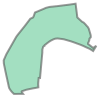

In [30]:
# POLYGONはこんな感じで描画されます
data.geometry[0]

Geopandasで単純なプロットをするとなるとこんな感じでしょうか。

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12507 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32207 missing from current font.
  font.set_

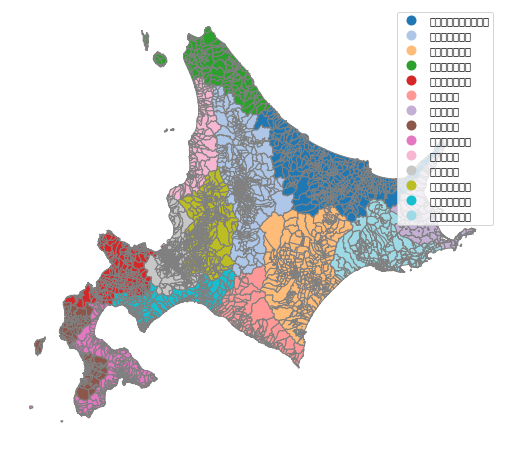

In [31]:
f, ax = plt.subplots(1, figsize=(10, 8))
ax.set_axis_off()
data.plot(column="SITYO_NAME", ax=ax, cmap='tab20',edgecolor='grey',legend=True);
plt.show()